# Physics of Stars Computer Project

### Anna Esselink (s4149653)
### Maria Dziouba (s3950425)

In [52]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:99% !important; }</style>")) #Uncomment these lines for fullscreen mode :)

import numpy as np
from matplotlib.pyplot import figure, show, ylim, xscale
from scipy.interpolate import interp2d
from scipy.integrate import solve_ivp
import seaborn as sns
#Import other prerequisites here

## Abstract

In this project...

## Part 1 - Reading & Interpolating Data

This part uses tables from the Opacity Project. Read the file **opacity_tables.tab**, which will explain what each table is for. You will see files named **table_xx_edited.txt** on Nestor. These are the necessary tables for this section (with **xx** corresponding to that table number in the opacity_tables file. The headers in these subfiles are removed for convenience. Note that you do not have all the data you need from just these files, and you may need to make some approximations with the data you are given. 

In [8]:
# Loading in data for necessary tables
# This is an "idiot-proof" way of doing it, feel free to do it in a nicer way  - original file is opacity_tables.tab
# Info on the tables also in opacity_tables.tab, so read that

# Tables loaded
opacity_OP_07_002 = np.loadtxt("table_73_edited.txt") 
opacity_OP_07_004 = np.loadtxt("table_75_edited.txt") 
opacity_OP_07_006 = np.loadtxt("table_76_edited.txt") 
opacity_OP_1 = np.loadtxt("table_115_edited.txt")

opacity_OP_07_002 = np.array(opacity_OP_07_002)

# Headers for interpolating (x-axis in table is logR, y-axis is logT)
logT_OP = np.array([3.75, 3.8, 3.85, 3.9, 3.95, 4.0, 4.05, 4.1, 4.15, 4.2, 4.25, 4.3, 4.35, 4.4, 4.45, 4.5, 4.55, 4.6, 4.65, 4.7, 4.75, 4.8, 4.85, 4.9, 4.95, 5.0, 5.05, 5.1, 5.15, 5.2, 5.25, 5.3, 5.35, 5.4, 5.45, 5.5, 5.55, 5.6, 5.65, 5.7, 5.75, 5.8, 5.85, 5.9, 5.95, 6.0, 6.1, 6.2, 6.3, 6.4, 6.5, 6.6, 6.7, 6.8, 6.9, 7.0, 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8, 7.9, 8.0])
logR_OP = np.array([-8.0, -7.5, -7.0, -6.5, -6.0, -5.5, -5.0, -4.5, -4.0, -3.5, -3.0, -2.5, -2.0, -1.5, -1.0, -0.5, 0.0, 0.5, 1.0])

In [9]:
# Interpolating data
# the way the tables are set up now, it works well with scipy.interpolate. 
# Write a very general interpolater to make it easier later.
sns.set_palette(sns.color_palette("hls", 4))

#f_xyz, where xyz are the composition parameters
f_1 = interp2d(logR_OP, logT_OP, opacity_OP_1) 
f_002 = interp2d(logR_OP, logT_OP, opacity_OP_07_002)
f_004 = interp2d(logR_OP, logT_OP, opacity_OP_07_004)
f_006 = interp2d(logR_OP, logT_OP, opacity_OP_07_006)

#data to reproduce fig 3.17
logT_plot = np.linspace(np.min(logT_OP), np.max(logT_OP), 100)
logR_plot = -3

opacity_plot_1 = f_1(logR_plot, logT_plot)
opacity_plot_002 = f_002(logR_plot, logT_plot)
opacity_plot_004 = f_004(logR_plot, logT_plot)
opacity_plot_006 = f_006(logR_plot, logT_plot)

# the opacity for Z=0.05 can be approximated by taking the mean of the interpolated
# functions of Z=0.04 and Z=0.06
opacity_plot_005 = np.mean([opacity_plot_004, opacity_plot_006], axis=0)

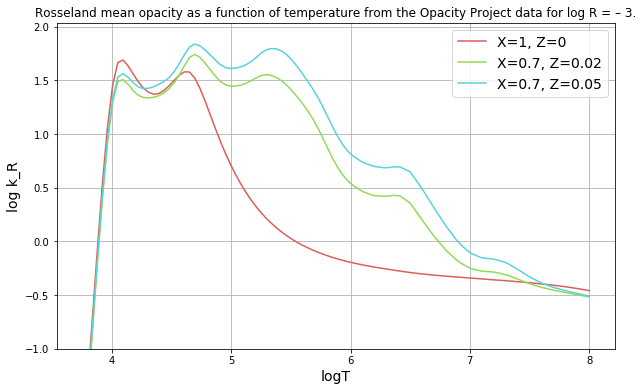

In [10]:
# Plotting data - Plot of κR vs log T

fig = figure(figsize=(10,6))
fr = fig.add_subplot(1,1,1)
fr.set_xlabel('logT', fontsize="14")
fr.set_ylabel('log k_R', fontsize="14")
fr.grid(True)
fr.plot(logT_plot, opacity_plot_1,"-", label = "X=1, Z=0")
fr.plot(logT_plot, opacity_plot_002,"-", label = "X=0.7, Z=0.02")
fr.plot(logT_plot, opacity_plot_005,"-", label = "X=0.7, Z=0.05")
#fr.plot(logT_plot, opacity_plot_006,"-", label = "X=0.7, Z=0.06")
fr.set_title("Rosseland mean opacity as a function of temperature from the Opacity Project data for log R = – 3.")
fr.legend(fontsize="14")
ylim(bottom=-1)
show()

### Extension to T, P

To be able to determine the opacity for the pressure we need a function for R in terms of P and T. For this we used equations 3.78 and 5.107. The density can be written as $\rho=R \cdot T_6^3=R\cdot10^{-18}T^3$. Substituting this into equation 5.107 gives us $P = \frac{\rho k T}{\mu m_H}= \frac{kRT^410^{-18}}{\mu m_H}$. For $\mu$, the mean molecular weight, we took a value of 1.3$m_H$, as this the approximate mean molecular weight for the Sun. This can also be calculated using equation 5.127 and the literary values for the mass fraction of the Sun, using the assumption that all atoms are neutral.  
The function below uses a given log P and log T to calculate the log R, which is then used in the previously interpolated function. The return function can be any of the interpolated functions, but below we used a combined version of a low and high temperature range as this is usefull later on.

In [55]:
def Log_opacity(logP, logT):
    """ Return the log of opacity for a given logP and logR"""
    k = 1.380658e-16  #erg/K Boltzmann constant
    mu = 1.3 #average mass in m_H
    mH = 1.6735344e-24   #g, mass of 1H atom
    logR = -np.log10(k/(mu*mH)) + logP - 4*logT + 18
    return f_opacity(logR, logT)   #opacity new defined in next question

### Extending the Interpolator

The Grevesse and Noels tables are opacity values for the same logR but for a lower tempeature range, 2.75 to 4.5 instead of 3.75 to 8. This data set can be interpolated in the exact same way as the Opacity Project tables.  
In the following section these two sets will be combined using the following linear combination:  
$k(logT)=c_1(logT)\cdot f_{OP}+c_2(logT) \cdot f_{GN}$  
$c_1(logT)=0$ for $logT<3.75$  
$c_2(logT)=1$ for $logT<3.75$  
$c_1(logT)=1$ for $4.5<logT$  
$c_2(logT)=0$ for $4.5<logT$  
In the overlapping regions $c_1$ linearly increases with logT and $c_2$ linearly decreases with logT. This leads to the following equations:  
$c_1=\frac{logT-3.75}{4.5-3.75}$ for $3.75<logT<4.5$  
$c_1=\frac{4.5-logT}{4.5-3.75}$ for $3.75<logT<4.5$  
This leads to that in the low range (2.75 to 3.75) the Grevesse and Noels tables are used, in the high range (4.5 to 8) the Opacity Project tables are used, while in the overlapping region the linear combination is used. This new data set can then be interpolated to create a new function that works for the whole range of logT.

In [40]:
# Load new table, if you want to do this more elegantly the raw table is g7_02.tron
opacity_GN = np.loadtxt("g7_02_edited.tron")
opacity_GN = np.array(opacity_GN)

# Headers for this table
logT_GN = np.array([4.5, 4.45, 4.4, 4.35, 4.3, 4.25, 4.2, 4.15, 4.1, 4.05, 4.0, 3.95, 3.9, 3.85, 3.8, 3.75, 3.7, 3.65, 3.6, 3.55, 3.5, 3.49, 3.48, 3.47, 3.46, 3.45, 3.44, 3.43, 3.42, 3.41, 3.4, 3.39, 3.38, 3.37, 3.36, 3.35, 3.34, 3.33, 3.32, 3.31, 3.3, 3.29, 3.28, 3.27, 3.26, 3.25, 3.24, 3.23, 3.22, 3.21, 3.2, 3.19, 3.18, 3.17, 3.16, 3.15, 3.14, 3.13, 3.12, 3.11, 3.1, 3.09, 3.08, 3.07, 3.06, 3.05, 3.04, 3.03, 3.02, 3.01, 3.0, 2.99, 2.98, 2.97, 2.96, 2.95, 2.94, 2.93, 2.92, 2.91, 2.9, 2.85, 2.8, 2.75, 2.7])
logR_GN = np.array([-8.0, -7.5, -7.0, -6.5, -6.0, -5.5, -5.0, -4.5, -4.0, -3.5, -3.0, -2.5, -2.0, -1.5, -1.0, -0.5, 0.0, 0.5, 1.0])

#interpolate Grevesse and Noels tables
f_702_GN = interp2d(logR_GN, logT_GN, opacity_GN)

#a = np.where(3.75 == logT_GN)
#opacity_Tlow = opacity_GN[a[0][0]:,:]

#b = np.where(4.5 == logT_OP)
#opacity_Thigh = opacity_OP_07_002[b[0][0]:,:]

#array of all logT's from low to high range
logT_new = np.array([2.7,  2.75, 2.8,  2.85, 2.9,  2.95, 3.,   3.05, 3.1,  3.15, 3.2,  3.25, 3.3,  3.35,
 3.4,  3.45, 3.5,  3.55, 3.6,  3.65, 3.7,  3.75, 3.8,  3.85, 3.9,  3.95, 4.,   4.05,
 4.1,  4.15, 4.2,  4.25, 4.3,  4.35, 4.4,  4.45, 4.5,  4.55, 4.6,  4.65, 4.7,  4.75,
 4.8,  4.85, 4.9,  4.95, 5.,   5.05, 5.1,  5.15, 5.2,  5.25, 5.3,  5.35, 5.4,  5.45,
 5.5,  5.55, 5.6,  5.65, 5.7,  5.75, 5.8,  5.85, 5.9,  5.95, 6., 6.1,
 6.2, 6.3, 6.4, 6.5, 6.6, 6.7, 6.8, 6.9, 7., 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8, 7.9, 8.])
#crazyyy bugs in python, so we had to do it this way instead of using
# logT_new = np.arange(2.70, 8.05, step = 0.05)
# logT_new = np.linspace(2.70, 8.05, 108)

# for 2.7<logT<3.75 --> lower T range
# for 3.75<logT<4.5 --> linear combination of low and high
# for 4.5<logT> 8.0 --> high T range

#create array of right amount of collumns to submit rows to
opacity_new = np.zeros(len(logR_OP))

for logT in logT_new:
    #row = list(logT_new).index(logT)
    if logT<= 3.75:  #low range
        row_low = list(logT_GN).index(logT)
        opacity_new = np.vstack((opacity_new, opacity_GN[row_low,:]))
    if logT > 3.75 and logT <= 4.5:  #overlap range
        c1 = (logT-3.75)/(4.5-3.75)    #high range coefficient
        c2 = (4.5-logT)/(4.5-3.75)     #low range coefficient
        row_low = list(logT_GN).index(logT)
        row_high = list(logT_OP).index(logT)
        #linear combination
        opacity_new = np.vstack((opacity_new, c1*opacity_OP_07_002[row_high,:] + c2*opacity_GN[row_low,:]))
    if logT > 4.5:  #high range
        row_high = list(logT_OP).index(logT)
        opacity_new = np.vstack((opacity_new, opacity_OP_07_002[row_high,:]))

#remove first array of only zeros
opacity_new = opacity_new[1:] 

#interpolate over new data set
f_opacity = interp2d(logR_OP, logT_new, opacity_new)

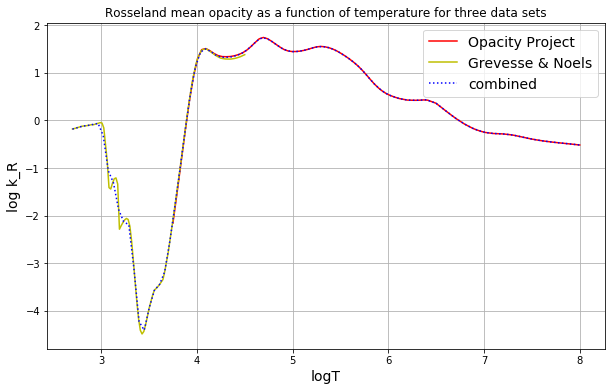

In [51]:
# Plot of log T vs log kappa

logR_plot = -3
logT_plot_GN = np.linspace(np.min(logT_GN), np.max(logT_GN), 100)
opacity_plot_002_GN = f_702_GN(logR_plot, logT_plot_GN)

logT_plot_new = np.linspace(np.min(logT_new), np.max(logT_new), 100)
opacity_plot_new = f_opacity(logR_plot, logT_plot_new)

fig = figure(figsize=(10,6))
fr = fig.add_subplot(1,1,1)
fr.set_xlabel('logT', fontsize="14")
fr.set_ylabel('log k_R', fontsize="14")
fr.grid(True)
fr.plot(logT_plot, opacity_plot_002,"r-", label = "Opacity Project")
fr.plot(logT_plot_GN, opacity_plot_002_GN,"y-", label = "Grevesse & Noels")
fr.plot(logT_plot_new, opacity_plot_new, "b:", label = "combined")
fr.legend(fontsize="14")
fr.set_title("Rosseland mean opacity as a function of temperature for three data sets")
#ylim(bottom=-1)
show()

## Part 2

### Derivation of T as a function of optical depth

You can use LaTeX math commands for derivations in a Juptyer notebook. Don't forget to state your assumptions.

Opacity independent of frequency --> grey atmosphere  
Opacity is given by Rosseland mean opacity




### Discuss opacity approximation (independent of frequency and given by the Rosseland mean opacity.)
discuss assumptions and their implications  
What temp profile can be adopted in this regime  
$0.05 \leq \tau \ \leq 2.0$

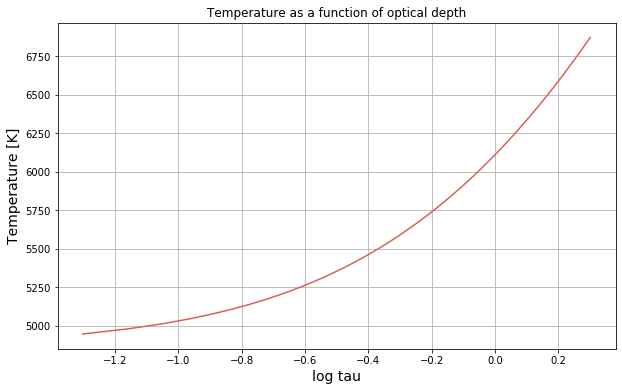

In [82]:
# Plot of T as a function of optical depth for region of interest - think about what you can show as a verification

def Temp(tau):
    Teff = 5777 #K, Teff of Sun
    return Teff*(3/4*(tau + 2/3))**0.25 


tau_plot = np.linspace(0.05, 2.0, 100)

fig = figure(figsize=(10,6))
fr = fig.add_subplot(1,1,1)
fr.set_xlabel('log tau', fontsize="14")
fr.set_ylabel('Temperature [K]', fontsize="14")
fr.grid(True)
fr.plot(np.log10(tau_plot), Temp(tau_plot),"-")
fr.set_title("Temperature as a function of optical depth")
#xscale('log')
#fr.legend(fontsize="14")
#ylim(bottom=-1)
show()


### Derivation of the equation of hydrostatic equilibrium
Hydrostatic equilibrium:  
$\frac{dP(r)}{dr}=-\rho(r)g(r)$  
...  

$\frac{dP}{d\tau}=\frac{g}{\kappa}$

...  


$P_g(\tau) = \left(\frac{1.8g}{10^{-4.4}}\tau \right)^{5/9}$


### Starting value for pressure

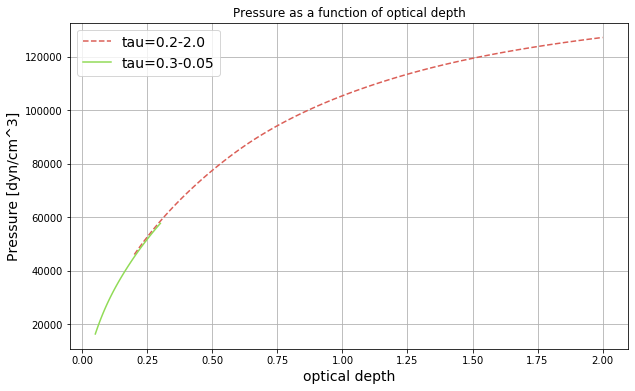

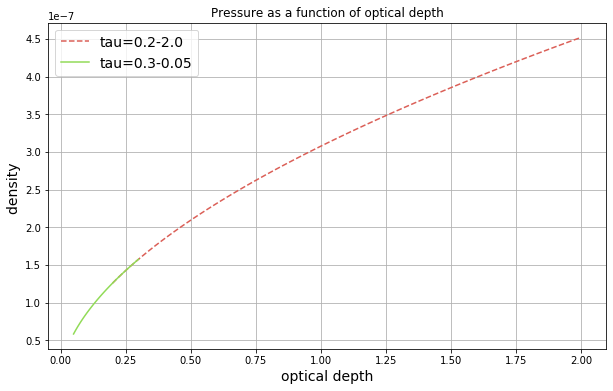

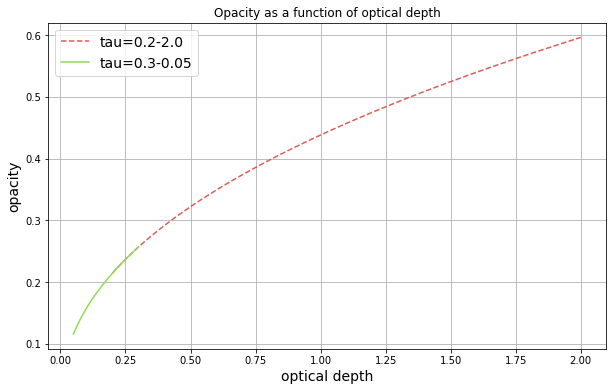

In [83]:
# Integration for starting pressure values

#calculating solar gravitational accelaration
G = 6.67259e-8  # cm^3 g^-1 s^-2
Msol = 1.9891e33  # g
Rsol = 6.95508e10  # cm
g = G*Msol/(Rsol**2)

def Pressure(tau):
    """ Calculate gravitational pressure as a function of optical depth"""
    p = 1.8*g*tau/(10**(-4.4))
    return p**(5/9)

#starting pressure values
P_02 = Pressure(0.2)
P_03 = Pressure(0.3)

#equation 1 from assignment, over which to integrate
def dPdtau(tau, P):
    logT = np.log10(Temp(tau))
    logP = np.log10(Pressure(tau))
    k = 10**Log_opacity(logP, logT)
    return g/k

tau_02 = np.linspace(0.2,2,100)
tau_03 = np.linspace(0.3,0.05,100)

Solve_02 = solve_ivp(dPdtau, t_span=[0.2, 2.0], y0=[P_02], dense_output=True) #come up with better names
Pprofile_02 = Solve_02.sol(tau_02)[0]

Solve_03 = solve_ivp(dPdtau, t_span=[0.3,0.05], y0=[P_03], dense_output=True) #come up with better names
Pprofile_03 = Solve_03.sol(tau_03)[0]

# Plot of pressure as a function of optical depth.
fig = figure(figsize=(10,6))
fr = fig.add_subplot(1,1,1)
fr.set_xlabel('optical depth', fontsize="14")
fr.set_ylabel('Pressure [dyn/cm^3]', fontsize="14")
fr.grid(True)
fr.plot(tau_02, Pprofile_02, "--", label='tau=0.2-2.0')
fr.plot(tau_03, Pprofile_03, "-", label='tau=0.3-0.05')
fr.legend(fontsize='14')
fr.set_title("Pressure as a function of optical depth")
show()

# Plot of density as a function of optical depth
def rho(tau):
    P = Pressure(tau)
    T = 5777 #Teff sun [K]
    k = 1.380658e-16  #erg/K Boltzmann constant
    mu = 1.3 #average mass in m_H
    mH = 1.6735344e-24   #g, mass of 1H atom 
    return P*mu*mH/(k*T)

fig = figure(figsize=(10,6))
fr = fig.add_subplot(1,1,1)
fr.set_xlabel('optical depth', fontsize="14")
fr.set_ylabel('density ', fontsize="14")
fr.grid(True)
fr.plot(tau_02, rho(tau_02), "--", label='tau=0.2-2.0')
fr.plot(tau_03, rho(tau_03), "-", label='tau=0.3-0.05')
fr.legend(fontsize='14')
fr.set_title("Pressure as a function of optical depth")
show()

# Plot of opacity as a function of optical depth
def kappa(tau):
    Pg = Pressure(tau)
    k = 10**(-4.4)*Pg**0.8
    return k

fig = figure(figsize=(10,6))
fr = fig.add_subplot(1,1,1)
fr.set_xlabel('optical depth', fontsize="14")
fr.set_ylabel('opacity', fontsize="14")
fr.grid(True)
fr.plot(tau_02, kappa(tau_02), "--", label='tau=0.2-2.0')
fr.plot(tau_03, kappa(tau_03), "-", label='tau=0.3-0.05')
fr.legend(fontsize='14')
fr.set_title("Opacity as a function of optical depth")
show()

### Relation between the optical depth and the geometrical depth

In [17]:
# Integration of equation

## Part 3

### Loading in MARCS data

The table **MARCS_solar_model.dat** from Nestor is already loaded for you.

In [18]:
# Extract values from MARCS table
MARCS_k, MARCS_logTau, MARCS_z, MARCS_Temp, MARCS_P_e, MARCS_P_g, MARCS_P_rad, MARCS_P_turb = np.loadtxt('MARCS_solar_model.dat').T


### Plots

Plot your model and the MARCS data on same axes, discuss each plot

### Plot of log tau vs T(tau)

In [19]:
# Plot

Discussion of plot

### Plot of log tau vs P(tau)

In [20]:
# Plot

Discussion of plot

### Plot of log tau vs rho(tau)

In [21]:
# Plot

Discussion of plot

### Plot of log tau vs kappa(tau)

In [22]:
# Plot

Discussion of plot

### Plot of log tau vs z(tau)

In [23]:
# Plot

Discussion of plot

## Part 4

Implement Saha equation to get ionisation fractions for H, He. Remember to discuss your plots, do they make sense?

In [24]:
# Saha function

In [25]:
# Plot of hydrogen ionization fraction as function of log tau

# plot of axes are important

# Plot of the ionisation fraction of helium as a function of log tau

## Part 5

### What would be the next step to create a model of an observed stellar spectrum?

## References 

Pick a style and stick to it. Make sure to also cite them in the report where you use them.